<a href="https://colab.research.google.com/github/yuriborg/time_series/blob/main/Time_Series_Darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1

## Libraries

In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.

In [2]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import ExponentialSmoothing, AutoARIMA
import matplotlib.pyplot as plt

## Data Extraction

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                 parse_dates=True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Feature Engineering

In [4]:
series = TimeSeries.from_dataframe(df, 'Month', 'Passengers')
len(series)

144

## Train Test Split

In [5]:
train, val = series.split_before(pd.Timestamp('19580101'))
train, val

(<TimeSeries (DataArray) (Month: 108, component: 1, sample: 1)>
 array([[[112.]],
 
        [[118.]],
 
        [[132.]],
 
        [[129.]],
 
        [[121.]],
 
        [[135.]],
 
        [[148.]],
 
        [[148.]],
 
        [[136.]],
 
        [[119.]],
 
 ...
 
        [[356.]],
 
        [[348.]],
 
        [[355.]],
 
        [[422.]],
 
        [[465.]],
 
        [[467.]],
 
        [[404.]],
 
        [[347.]],
 
        [[305.]],
 
        [[336.]]])
 Coordinates:
   * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1957-12-01
   * component  (component) object 'Passengers'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (Month: 36, component: 1, sample: 1)>
 array([[[340.]],
 
        [[318.]],
 
        [[362.]],
 
        [[348.]],
 
        [[363.]],
 
        [[435.]],
 
        [[491.]],
 
        [[505.]],
 
        [[404.]],
 
        [[359.]],
 
 ...
 
        

In [6]:
len(train), len(val)

(108, 36)

## Model 1 - Exponential Smoothing

In [7]:
model_es = ExponentialSmoothing()
model_es.fit(train)
prediction_es = model_es.predict(len(val))

## Model Evaluation 1

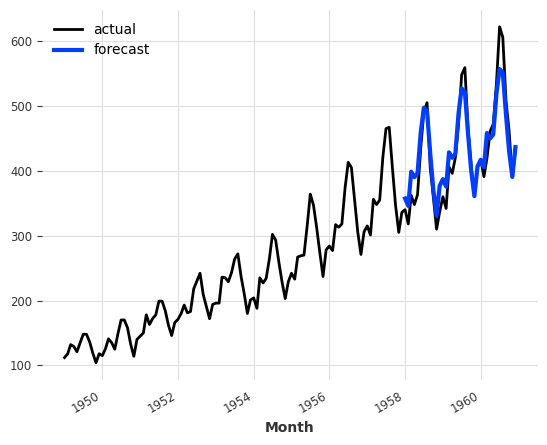

In [8]:
series.plot(label='actual')
prediction_es.plot(label='forecast', lw=3)
plt.legend()

## Model 2 - AutoARIMA

In [9]:
model_aa = AutoARIMA()
model_aa.fit(train)
prediction_aa = model_aa.predict(len(val))

## Model Evaluation 2

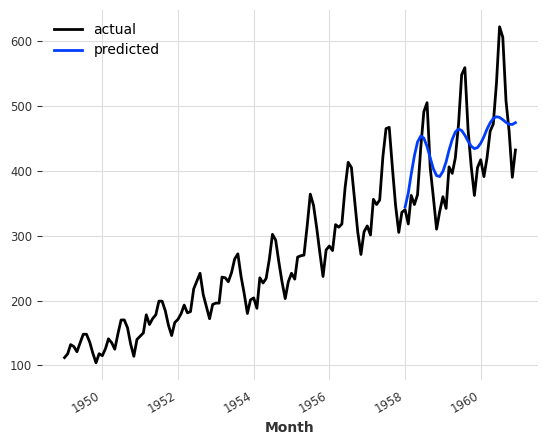

In [10]:
series.plot(label='actual')
prediction_aa.plot(label='predicted')
plt.legend()

# Example 2 - Backtesting

## Libraries

In [14]:
from darts.models import Prophet
from darts.metrics import mape

## Models

In [12]:
models = [ExponentialSmoothing(), Prophet()]
backtests = [model.historical_forecasts(series,
                                        start=.5,
                                        forecast_horizon=3)
            for model in models]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe__n6nz/6l6kl1er.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe__n6nz/bjahwov4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54834', 'data', 'file=/tmp/tmpoe__n6nz/6l6kl1er.json', 'init=/tmp/tmpoe__n6nz/bjahwov4.json', 'output', 'file=/tmp/tmpoe__n6nz/prophet_modelqjgk9zl3/prophet_model-20231227162628.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:26:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:26:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

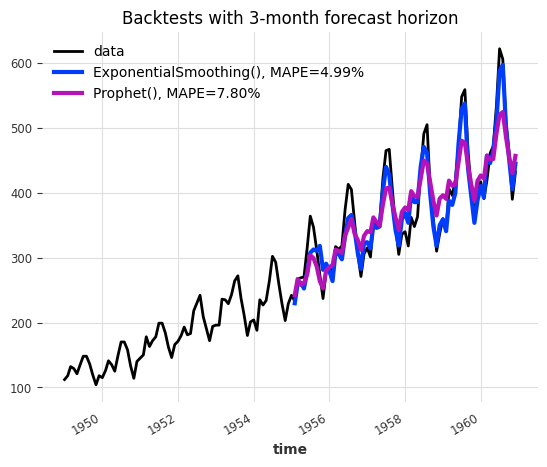

In [15]:
series.plot(label='data')
for i, m in enumerate(models):
  err = mape(backtests[i], series)
  backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-month forecast horizon')
plt.legend()